# Assesment_Problem 2

In [58]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Collect data/Load data

In [59]:
df = pd.read_csv("C:/Users/Rahul/ML_data/public_up_to_150k.csv")
df.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,3509338307,01/22/2021,NaN,PPS,Exemption 6,NaN,NaN,NaN,NaN,02/18/2022,...,Non-Profit Organization,NaN,NaN,NaN,NaN,Unanswered,Unanswered,Y,150775.38,01/13/2022
1,5375617707,05/01/2020,101.0,PPP,NOT AVAILABLE,NaN,NaN,NaN,NaN,07/16/2021,...,NaN,9551.0,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,NaN,150083.01,06/11/2021
2,9677497701,05/01/2020,464.0,PPP,NORTH CHARLESTON HOSPITALITY GROUP LLC,192 College Park Rd,Ladson,NaN,29456-3517,09/25/2021,...,Limited Liability Company(LLC),19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,141920.11,08/25/2021
3,9547167709,05/01/2020,464.0,PPP,Q AND J SERVICES LLC,301 Old Georgetown Road,Manning,NaN,29102-2734,04/20/2021,...,Limited Liability Company(LLC),19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,137747.78,03/29/2021
4,8885207205,04/28/2020,NaN,PPP,Exemption 6,NaN,NaN,NaN,NaN,05/20/2021,...,Non-Profit Organization,NaN,NaN,NaN,NaN,Unanswered,Unanswered,Y,131876.98,04/27/2021


## Task: Process and analyze the public data provided by SBA.gov for each US state toextract meaningful insights from features in the dataset. 

### Data Exploration

In [60]:
df.shape

(900000, 53)

In [61]:
# get info of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LoanNumber                   900000 non-null  int64  
 1   DateApproved                 900000 non-null  object 
 2   SBAOfficeCode                899973 non-null  float64
 3   ProcessingMethod             900000 non-null  object 
 4   BorrowerName                 899998 non-null  object 
 5   BorrowerAddress              899859 non-null  object 
 6   BorrowerCity                 899858 non-null  object 
 7   BorrowerState                899849 non-null  object 
 8   BorrowerZip                  899860 non-null  object 
 9   LoanStatusDate               825104 non-null  object 
 10  LoanStatus                   900000 non-null  object 
 11  Term                         900000 non-null  int64  
 12  SBAGuarantyPercentage        900000 non-null  int64  
 13 

In [62]:
# now get them mean, median etc. of our whole dataset
df.describe()

,LoanNumber,SBAOfficeCode,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,ServicingLenderLocationID,JobsReported,NAICSCode,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,OriginatingLenderLocationID,ForgivenessAmount
count,9.000000e+05,899973.000000,900000.000000,900000.0,9.000000e+05,900000.000000,899930.000000,899973.000000,899999.000000,886628.000000,271828.000000,899067.000000,19322.000000,49401.000000,8492.000000,19066.000000,11468.000000,899973.000000,831001.000000
mean,5.391930e+09,827.963318,44.103728,100.0,4.127176e+04,40859.252579,0.676530,179772.359074,5.769956,545660.618988,879.144789,40009.441966,3677.321075,7555.121229,3497.435133,3534.284429,1833.709158,179417.835818,42095.224980
std,2.547579e+09,193.935108,18.052414,0.0,4.804952e+04,34685.273952,165.411638,203952.049015,11.862700,189856.452953,3697.702647,34087.282502,7291.454215,7334.956728,11983.357380,4997.234206,5028.064307,204432.196291,35283.654075
min,1.000009e+09,101.000000,0.000000,100.0,0.000000e+00,10.000000,0.000000,20.000000,-6.000000,111110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.010000
25%,3.194628e+09,669.000000,24.000000,100.0,1.978200e+04,19875.000000,0.000000,12096.000000,1.000000,448120.000000,1.000000,19078.750000,0.000000,2600.000000,0.000000,0.000000,0.000000,12096.000000,19978.470000
50%,5.367487e+09,914.000000,60.000000,100.0,2.729500e+04,27323.000000,0.000000,72601.000000,3.000000,541512.000000,1.000000,26516.330000,1000.000000,5675.000000,0.000000,2033.000000,0.000000,72601.000000,29053.040000
75%,7.501583e+09,942.000000,60.000000,100.0,5.686700e+04,56697.125000,0.000000,437389.000000,7.000000,711410.000000,1.000000,55208.000000,4471.212500,10146.000000,0.000000,5000.000000,1800.000000,440693.000000,59024.270000
max,9.998978e+09,9030.000000,79.000000,100.0,1.000000e+07,149999.500000,99455.000000,538160.000000,500.000000,999990.000000,148700.000000,149999.000000,135682.000000,115000.000000,149137.000000,137500.000000,120692.000000,533179.000000,152782.410000


**Now let's get the summary for continous dataset**

In [63]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(), x.std(), x.var(), x.min(), 
        x.quantile(0.01), x.quantile(0.05), x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                     
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [64]:
num_f = df.select_dtypes([np.number])
num_f.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
LoanNumber,900000.0,0.0,4.852737e+15,5.391930e+09,5.367487e+09,2.547579e+09,6.490158e+18,1.000009e+09,1.090569e+09,1.462765e+09,1.891657e+09,3.194628e+09,5.367487e+09,7.501583e+09,9.011762e+09,9.541249e+09,9.913738e+09,9.998978e+09
SBAOfficeCode,899973.0,27.0,7.451446e+08,8.279633e+02,9.140000e+02,1.939351e+02,3.761083e+04,1.010000e+02,4.590000e+02,4.590000e+02,4.590000e+02,6.690000e+02,9.140000e+02,9.420000e+02,9.880000e+02,9.880000e+02,1.084000e+03,9.030000e+03
Term,900000.0,0.0,3.969336e+07,4.410373e+01,6.000000e+01,1.805241e+01,3.258897e+02,0.000000e+00,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,7.900000e+01
SBAGuarantyPercentage,900000.0,0.0,9.000000e+07,1.000000e+02,1.000000e+02,0.000000e+00,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
InitialApprovalAmount,900000.0,0.0,3.714458e+10,4.127176e+04,2.729500e+04,4.804952e+04,2.308756e+09,0.000000e+00,1.400000e+03,3.761000e+03,6.755000e+03,1.978200e+04,2.729500e+04,5.686700e+04,9.680000e+04,1.195000e+05,1.446000e+05,1.000000e+07
CurrentApprovalAmount,900000.0,0.0,3.677333e+10,4.085925e+04,2.732300e+04,3.468527e+04,1.203068e+09,1.000000e+01,1.418998e+03,3.773000e+03,6.781967e+03,1.987500e+04,2.732300e+04,5.669712e+04,9.623000e+04,1.186571e+05,1.434470e+05,1.499995e+05
UndisbursedAmount,899930.0,70.0,6.088299e+05,6.765302e-01,0.000000e+00,1.654116e+02,2.736101e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.945500e+04
ServicingLenderLocationID,899973.0,27.0,1.617903e+11,1.797724e+05,7.260100e+04,2.039520e+05,4.159644e+10,2.000000e+01,2.037000e+03,4.089000e+03,4.754000e+03,1.209600e+04,7.260100e+04,4.373890e+05,5.246120e+05,5.294310e+05,5.302230e+05,5.381600e+05
JobsReported,899999.0,1.0,5.192955e+06,5.769956e+00,3.000000e+00,1.186270e+01,1.407236e+02,-6.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,7.000000e+00,1.200000e+01,1.700000e+01,3.500000e+01,5.000000e+02
NAICSCode,886628.0,13372.0,4.837980e+11,5.456606e+05,5.415120e+05,1.898565e+05,3.604547e+10,1.111100e+05,1.119400e+05,2.361150e+05,2.382200e+05,4.481200e+05,5.415120e+05,7.114100e+05,8.121120e+05,8.129900e+05,9.999900e+05,9.999900e+05


In [65]:
df.isnull().sum()

LoanNumber                          0
DateApproved                        0
SBAOfficeCode                      27
ProcessingMethod                    0
BorrowerName                        2
BorrowerAddress                   141
BorrowerCity                      142
BorrowerState                     151
BorrowerZip                       140
LoanStatusDate                  74896
LoanStatus                          0
Term                                0
SBAGuarantyPercentage               0
InitialApprovalAmount               0
CurrentApprovalAmount               0
UndisbursedAmount                  70
FranchiseName                  885790
ServicingLenderLocationID          27
ServicingLenderName                27
ServicingLenderAddress             27
ServicingLenderCity                27
ServicingLenderState               27
ServicingLenderZip                 27
RuralUrbanIndicator                 0
HubzoneIndicator                    0
LMIIndicator                        1
BusinessAgeD

## 2. Dealing with Missing value

In [66]:
def find_missing_percent(dataframe):
    """
        Input = get a dataframe in which you want to find the missing value
        return = total missing percentage
    """
    percent_nan = 100 * dataframe.isnull().sum() / len(dataframe)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    
    return percent_nan

In [67]:
miss_per = find_missing_percent(df)
miss_per

JobsReported                    0.000111
LMIIndicator                    0.000111
BorrowerName                    0.000222
SBAOfficeCode                   0.003000
OriginatingLenderState          0.003000
OriginatingLenderCity           0.003000
OriginatingLender               0.003000
OriginatingLenderLocationID     0.003000
ServicingLenderLocationID       0.003000
ServicingLenderName             0.003000
ServicingLenderAddress          0.003000
ServicingLenderCity             0.003000
ServicingLenderState            0.003000
ServicingLenderZip              0.003000
UndisbursedAmount               0.007778
ProjectState                    0.014556
BorrowerZip                     0.015556
BorrowerAddress                 0.015667
ProjectZip                      0.015667
BorrowerCity                    0.015778
ProjectCity                     0.015889
BorrowerState                   0.016778
BusinessType                    0.016889
CD                              0.022222
ProjectCountyNam

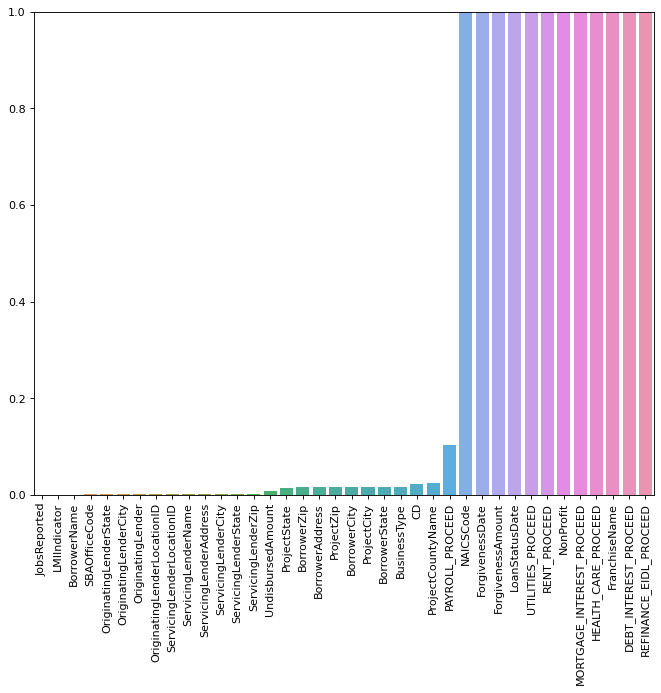

In [68]:
plt.figure(figsize=(10,8),dpi = 80)
sns.barplot(x = miss_per.index, y = miss_per)
plt.xticks(rotation=90)
plt.ylim(0,1);

**From above graph we have these `RENT_PROCEEDa0,NonProfit,MORTGAGE_INTEREST_PROCEED,HEALTH_CARE_PROCEED, FranchiseName, DEBT_INTEREST_PROCEED, REFINANCE_EIDL_PROCEED` whihc have 95% or above missing value so we can drop these columns**

In [69]:
high_missing_value = ['RENT_PROCEED', 'NonProfit', 'MORTGAGE_INTEREST_PROCEED', 'HEALTH_CARE_PROCEED'
                      , 'FranchiseName', 'DEBT_INTEREST_PROCEED', 'REFINANCE_EIDL_PROCEED']

In [70]:
df = df.drop(high_missing_value, axis = 1)
df.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,PAYROLL_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,ForgivenessAmount,ForgivenessDate
0,3509338307,01/22/2021,NaN,PPS,Exemption 6,NaN,NaN,NaN,NaN,02/18/2022,...,149357.60,Non-Profit Organization,NaN,NaN,NaN,NaN,Unanswered,Unanswered,150775.38,01/13/2022
1,5375617707,05/01/2020,101.0,PPP,NOT AVAILABLE,NaN,NaN,NaN,NaN,07/16/2021,...,148440.00,NaN,9551.0,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,150083.01,06/11/2021
2,9677497701,05/01/2020,464.0,PPP,NORTH CHARLESTON HOSPITALITY GROUP LLC,192 College Park Rd,Ladson,NaN,29456-3517,09/25/2021,...,140081.78,Limited Liability Company(LLC),19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,141920.11,08/25/2021
3,9547167709,05/01/2020,464.0,PPP,Q AND J SERVICES LLC,301 Old Georgetown Road,Manning,NaN,29102-2734,04/20/2021,...,136520.96,Limited Liability Company(LLC),19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,137747.78,03/29/2021
4,8885207205,04/28/2020,NaN,PPP,Exemption 6,NaN,NaN,NaN,NaN,05/20/2021,...,130600.00,Non-Profit Organization,NaN,NaN,NaN,NaN,Unanswered,Unanswered,131876.98,04/27/2021


In [71]:
miss_per1 = find_missing_percent(df)
miss_per1

JobsReported                    0.000111
LMIIndicator                    0.000111
BorrowerName                    0.000222
OriginatingLenderLocationID     0.003000
OriginatingLender               0.003000
ServicingLenderZip              0.003000
ServicingLenderState            0.003000
ServicingLenderCity             0.003000
ServicingLenderAddress          0.003000
SBAOfficeCode                   0.003000
ServicingLenderLocationID       0.003000
OriginatingLenderCity           0.003000
OriginatingLenderState          0.003000
ServicingLenderName             0.003000
UndisbursedAmount               0.007778
ProjectState                    0.014556
BorrowerZip                     0.015556
BorrowerAddress                 0.015667
ProjectZip                      0.015667
BorrowerCity                    0.015778
ProjectCity                     0.015889
BorrowerState                   0.016778
BusinessType                    0.016889
CD                              0.022222
ProjectCountyNam

In [72]:
df['UTILITIES_PROCEED'].isnull().sum()

628172

In [73]:
df = df.drop('UTILITIES_PROCEED', axis = 1)

In [74]:
miss_per2 = find_missing_percent(df)
miss_per2

LMIIndicator                   0.000111
JobsReported                   0.000111
BorrowerName                   0.000222
OriginatingLenderState         0.003000
OriginatingLenderCity          0.003000
OriginatingLender              0.003000
OriginatingLenderLocationID    0.003000
ServicingLenderZip             0.003000
ServicingLenderState           0.003000
ServicingLenderCity            0.003000
SBAOfficeCode                  0.003000
ServicingLenderName            0.003000
ServicingLenderLocationID      0.003000
ServicingLenderAddress         0.003000
UndisbursedAmount              0.007778
ProjectState                   0.014556
BorrowerZip                    0.015556
BorrowerAddress                0.015667
ProjectZip                     0.015667
BorrowerCity                   0.015778
ProjectCity                    0.015889
BorrowerState                  0.016778
BusinessType                   0.016889
CD                             0.022222
ProjectCountyName              0.023889


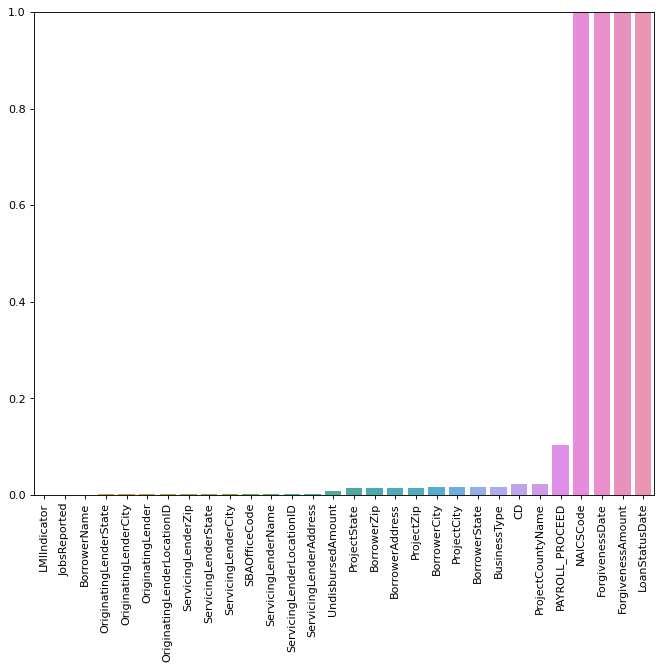

In [75]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x = miss_per2.index, y = miss_per2)
plt.xticks(rotation=90)
plt.ylim(0,1);

**less missing value**

In [76]:
df['NAICSCode'].isnull().sum()

13372

In [77]:
df['ForgivenessDate'].isnull().sum()

68999

In [78]:
df['ForgivenessAmount'].isnull().sum()

68999

In [79]:
df['LoanStatusDate'].isnull().sum()

74896

In [80]:
df['NAICSCode']= df['NAICSCode'].fillna(df['NAICSCode'].median())

In [81]:
df = df.drop(['ForgivenessDate','LoanStatusDate'], axis = 1)

In [82]:
df['ForgivenessAmount']= df['ForgivenessAmount'].fillna(df['ForgivenessAmount'].median())

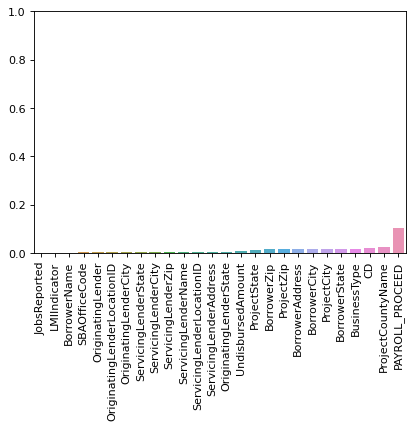

In [83]:
miss_per3 = find_missing_percent(df)
plt.figure(figsize=(6,4), dpi = 80)
sns.barplot(x = miss_per3.index, y = miss_per3)
plt.xticks(rotation=90)
plt.ylim(0,1);

In [84]:
df[df['OriginatingLenderState'].isnull()] 

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatus,...,Ethnicity,PAYROLL_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,ForgivenessAmount
0,3509338307,01/22/2021,NaN,PPS,Exemption 6,NaN,NaN,NaN,NaN,Paid in Full,...,Unknown/NotStated,149357.60,Non-Profit Organization,NaN,NaN,NaN,NaN,Unanswered,Unanswered,150775.38
4,8885207205,04/28/2020,NaN,PPP,Exemption 6,NaN,NaN,NaN,NaN,Paid in Full,...,Unknown/NotStated,130600.00,Non-Profit Organization,NaN,NaN,NaN,NaN,Unanswered,Unanswered,131876.98
10,2767027201,04/16/2020,NaN,PPP,Exemption 6,NaN,NaN,NaN,NaN,Paid in Full,...,Unknown/NotStated,71309.00,Subchapter S Corporation,NaN,NaN,NaN,NaN,Unanswered,Unanswered,91638.00
36,1752547708,05/01/2020,NaN,PPP,Exemption 6,NaN,NaN,NaN,NaN,Paid in Full,...,Unknown/NotStated,30000.00,Limited Liability Company(LLC),NaN,NaN,NaN,NaN,Unanswered,Unanswered,30313.60
54,2480388900,04/26/2021,NaN,PPP,Exemption 6,NaN,NaN,NaN,NaN,Exemption 4,...,Unknown/NotStated,20833.00,Sole Proprietorship,NaN,NaN,NaN,NaN,Unanswered,Unanswered,29053.04
62,7936128807,04/22/2021,NaN,PPP,Exemption 6,NaN,NaN,NaN,NaN,Paid in Full,...,Unknown/NotStated,20830.00,Sole Proprietorship,NaN,NaN,NaN,NaN,Male Owned,Unanswered,20927.48
64,3558948407,02/05/2021,NaN,PPP,Exemption 6,NaN,NaN,NaN,NaN,Paid in Full,...,Not Hispanic or Latino,20574.00,Sole Proprietorship,NaN,NaN,NaN,NaN,Male Owned,Non-Veteran,20668.73
65,4275308005,06/25/2020,NaN,PPP,Exemption 6,NaN,NaN,NaN,NaN,Exemption 4,...,Unknown/NotStated,20468.00,Self-Employed Individuals,NaN,NaN,NaN,NaN,Unanswered,Unanswered,29053.04
67,8770668700,04/08/2021,NaN,PPP,Exemption 6,NaN,NaN,NaN,NaN,Paid in Full,...,Not Hispanic or Latino,20205.00,Sole Proprietorship,NaN,NaN,NaN,NaN,Female Owned,Non-Veteran,20243.48
70,8547728702,04/07/2021,NaN,PPP,Exemption 6,NaN,NaN,NaN,NaN,Paid in Full,...,Not Hispanic or Latino,18745.00,Sole Proprietorship,NaN,NaN,NaN,NaN,Female Owned,Non-Veteran,18821.88


**From above we got** `['SBAOfficeCode','BorrowerAddress','BorrowerCity','BorrowerState','BorrowerZip','OriginatingLenderLocationID','OriginatingLender','OriginatingLenderCity', 'OriginatingLenderState']` **these columns have same missing value so we drop these rows**

In [85]:
min_miss_val = [150,148,145, 143, 144, 142, 131, 124, 121, 118, 117, 110, 109, 106, 105, 93, 86, 70, 67, 65, 64, 62, 54, 36, 10, 4, 0]

In [86]:
df = df.drop(min_miss_val)

In [87]:
miss_per4 = find_missing_percent(df)
miss_per4

LMIIndicator         0.000111
JobsReported         0.000111
BorrowerName         0.000222
UndisbursedAmount    0.007778
ProjectState         0.011556
BorrowerZip          0.012556
BorrowerAddress      0.012667
ProjectZip           0.012667
BorrowerCity         0.012778
ProjectCity          0.012889
BorrowerState        0.013778
BusinessType         0.016889
CD                   0.019223
ProjectCountyName    0.020890
PAYROLL_PROCEED      0.103670
dtype: float64

In [88]:
df[df['LMIIndicator'].isnull()]

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatus,...,Ethnicity,PAYROLL_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,ForgivenessAmount
856078,2399777405,05/05/2020,912.0,PPP,ROBIN EKISS,3409 20th St,SAN FRANCISCO,CA,94110-2517,Paid in Full,...,Unknown/NotStated,15624.75,Sole Proprietorship,514546.0,"BSD Capital, LLC dba Lendistry",Brea,CA,Unanswered,Unanswered,21037.33


In [89]:
df[df['JobsReported'].isnull()]

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatus,...,Ethnicity,PAYROLL_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,ForgivenessAmount
580866,4953687704,05/03/2020,912.0,PPP,"VICTORY OUTREACH SAN JOSE, INC",590 SHAWNEE LANE,SAN JOSE,CA,95123,Exemption 4,...,Unknown/NotStated,62900.0,Corporation,12096.0,"Wells Fargo Bank, National Association",SIOUX FALLS,SD,Unanswered,Unanswered,29053.04


In [90]:
df = df.drop([856078, 580866])

In [91]:
df['BorrowerAddress'] = df['BorrowerAddress'].fillna(0)

In [92]:
df['ProjectZip'] =df['ProjectZip'].fillna(0)

In [93]:
df['BorrowerCity'] = df['BorrowerCity'].fillna(0)

In [94]:
miss_per5 = find_missing_percent(df)
miss_per5

BorrowerName         0.000222
UndisbursedAmount    0.007667
ProjectState         0.011556
BorrowerZip          0.012556
ProjectCity          0.012889
BorrowerState        0.013778
BusinessType         0.016889
CD                   0.019223
ProjectCountyName    0.020890
PAYROLL_PROCEED      0.103670
dtype: float64

In [95]:
df['PAYROLL_PROCEED'] =  df['PAYROLL_PROCEED'].fillna(df['PAYROLL_PROCEED'].median())

In [96]:
df[df['BorrowerName'].isnull()]

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatus,...,Ethnicity,PAYROLL_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,ForgivenessAmount
151050,7486377807,06/03/2020,459.0,PPP,NaN,520 40TH STREET,TUSCALOOSA,AL,35405-3724,Exemption 4,...,Unknown/NotStated,6003.0,Self-Employed Individuals,529113.0,"Kabbage, Inc.",Atlanta,GA,Unanswered,Unanswered,29053.04
595428,9820738810,04/24/2021,914.0,PPS,NaN,1448 18th St,Santa Monica,CA,90404-2804,Paid in Full,...,Unknown/NotStated,58986.5,Non-Profit Organization,11822.0,"MUFG Union Bank, National Association",SAN FRANCISCO,CA,Unanswered,Unanswered,59275.17


In [97]:
df = df.drop([151050,595428])

In [98]:
df['UndisbursedAmount'] = df['UndisbursedAmount'].fillna(df['UndisbursedAmount'].median())

In [99]:
df['BorrowerZip'] = df['BorrowerZip'].fillna(0)

In [100]:
miss_per6 = find_missing_percent(df)
miss_per6

ProjectState         0.011556
ProjectCity          0.012889
BorrowerState        0.013778
BusinessType         0.016889
CD                   0.019223
ProjectCountyName    0.020890
dtype: float64

In [101]:
df.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatus,...,Ethnicity,PAYROLL_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,ForgivenessAmount
1,5375617707,05/01/2020,101.0,PPP,NOT AVAILABLE,0,0,NaN,0,Paid in Full,...,Unknown/NotStated,148440.00,NaN,9551.0,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,150083.01
2,9677497701,05/01/2020,464.0,PPP,NORTH CHARLESTON HOSPITALITY GROUP LLC,192 College Park Rd,Ladson,NaN,29456-3517,Paid in Full,...,Unknown/NotStated,140081.78,Limited Liability Company(LLC),19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,141920.11
3,9547167709,05/01/2020,464.0,PPP,Q AND J SERVICES LLC,301 Old Georgetown Road,Manning,NaN,29102-2734,Paid in Full,...,Unknown/NotStated,136520.96,Limited Liability Company(LLC),19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,137747.78
5,6448037706,05/01/2020,515.0,PPP,OPTIMIZED PROCESS SOLUTIONS DBA AAA INDUSTRIES,24500 CAPITOL,REDFORD,NaN,48239-2446,Paid in Full,...,Not Hispanic or Latino,126798.00,Limited Liability Company(LLC),9551.0,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,127836.70
6,9609017706,05/01/2020,464.0,PPP,"D2 POWER SPORTS, LLC",125 Simuel Dr.,Spartanburg,NaN,29303-2085,Paid in Full,...,Unknown/NotStated,125916.00,Limited Liability Company(LLC),19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,127109.61


In [102]:
miss_per7 = find_missing_percent(df)
miss_per7

ProjectState         0.011556
ProjectCity          0.012889
BorrowerState        0.013778
BusinessType         0.016889
CD                   0.019223
ProjectCountyName    0.020890
dtype: float64

In [103]:
df['ProjectState'] = df['ProjectState'].fillna(0)
df['ProjectCity'] = df['ProjectCity'].fillna(0)
df['BorrowerState'] = df['BorrowerState'].fillna(0)
df['BusinessType'] = df['BusinessType'].fillna(0)
df['CD'] = df['CD'].fillna(0)
df['ProjectCountyName'] = df['ProjectCountyName'].fillna(0)

## 3. Dealing with outliers

C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


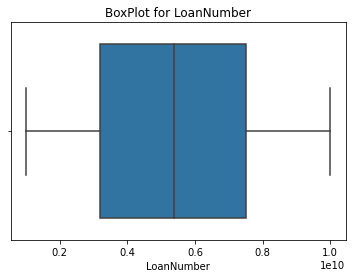

C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


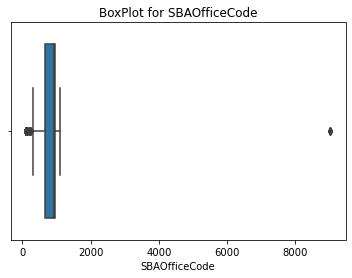

C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


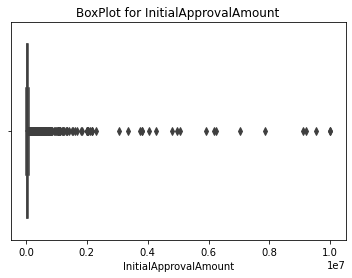

C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


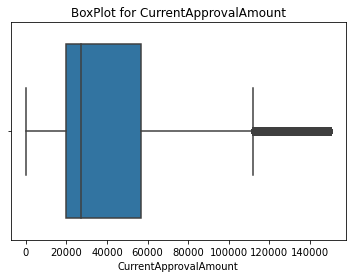

C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


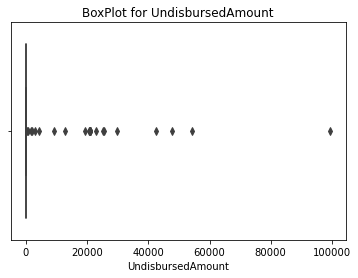

C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


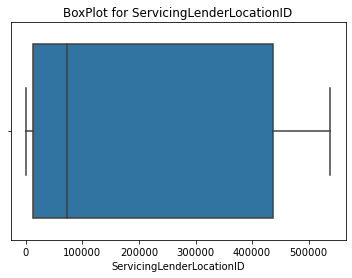

C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


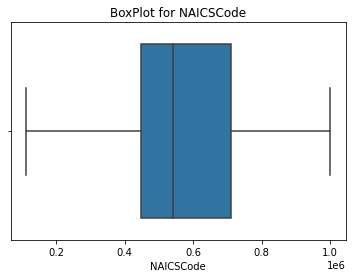

C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


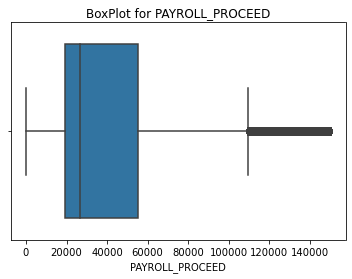

C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


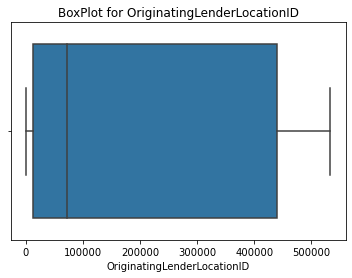

C:\Users\Rahul\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


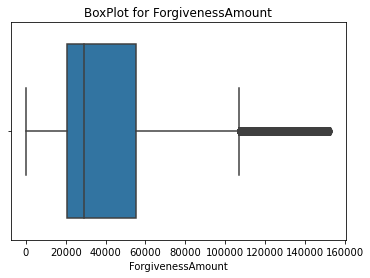

In [104]:
num_var = df.columns
num_var = ['LoanNumber', 'SBAOfficeCode',
       'InitialApprovalAmount', 'CurrentApprovalAmount', 'UndisbursedAmount',
       'ServicingLenderLocationID',
       'NAICSCode',  'PAYROLL_PROCEED',
       'OriginatingLenderLocationID',
       'ForgivenessAmount']
for var in num_var:
    sns.boxplot(df[var]);
    plt.title('BoxPlot for {}'.format(var))
    plt.show()

In [105]:
num_vars = df.columns
num_vars = ['DateApproved', 'ProcessingMethod',
       'BorrowerName', 'BorrowerAddress', 'BorrowerCity', 'BorrowerState',
       'BorrowerZip', 'LoanStatus', 'Term', 'SBAGuarantyPercentage', 'ServicingLenderName',
       'ServicingLenderAddress', 'ServicingLenderCity', 'ServicingLenderState',
       'ServicingLenderZip', 'RuralUrbanIndicator', 'HubzoneIndicator',
       'LMIIndicator', 'BusinessAgeDescription', 'ProjectCity',
       'ProjectCountyName', 'ProjectState', 'ProjectZip', 'CD', 'JobsReported',
        'Race', 'Ethnicity', 'BusinessType', 'OriginatingLender',
       'OriginatingLenderCity', 'OriginatingLenderState', 'Gender', 'Veteran']

**numerical and str values**

In [106]:
df[num_vars]

,DateApproved,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatus,Term,SBAGuarantyPercentage,...,CD,JobsReported,Race,Ethnicity,BusinessType,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran
1,05/01/2020,PPP,NOT AVAILABLE,0,0,0,0,Paid in Full,24,100,...,0,12.0,Unanswered,Unknown/NotStated,0,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered
2,05/01/2020,PPP,NORTH CHARLESTON HOSPITALITY GROUP LLC,192 College Park Rd,Ladson,0,29456-3517,Paid in Full,24,100,...,SC-01,3.0,Unanswered,Unknown/NotStated,Limited Liability Company(LLC),Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered
3,05/01/2020,PPP,Q AND J SERVICES LLC,301 Old Georgetown Road,Manning,0,29102-2734,Paid in Full,24,100,...,SC-06,170.0,Unanswered,Unknown/NotStated,Limited Liability Company(LLC),Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered
5,05/01/2020,PPP,OPTIMIZED PROCESS SOLUTIONS DBA AAA INDUSTRIES,24500 CAPITOL,REDFORD,0,48239-2446,Paid in Full,24,100,...,MI-13,20.0,Unanswered,Not Hispanic or Latino,Limited Liability Company(LLC),"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran
6,05/01/2020,PPP,"D2 POWER SPORTS, LLC",125 Simuel Dr.,Spartanburg,0,29303-2085,Paid in Full,24,100,...,SC-04,13.0,Unanswered,Unknown/NotStated,Limited Liability Company(LLC),Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,05/23/2021,PPS,AHMED ESSA,60 Mihalakis St,Milpitas,CA,95035-6298,Paid in Full,60,100,...,CA-17,1.0,Unanswered,Unknown/NotStated,Sole Proprietorship,"BSD Capital, LLC dba Lendistry",Brea,CA,Unanswered,Unanswered
899996,05/23/2021,PPP,SHERONDA JACKSON,2909 Marconi Ave,Sacramento,CA,95821-5067,Paid in Full,60,100,...,CA-06,1.0,Unanswered,Unknown/NotStated,Self-Employed Individuals,"BSD Capital, LLC dba Lendistry",Brea,CA,Unanswered,Unanswered
899997,03/23/2021,PPP,DERRICK STANBERRY,11512 Simms Ave,Inglewood,CA,90303-6845,Exemption 4,60,100,...,CA-43,1.0,Unanswered,Unknown/NotStated,Sole Proprietorship,Cross River Bank,TEANECK,NJ,Male Owned,Non-Veteran
899998,05/23/2021,PPS,THI THAI,4142 E Mendez St,Long Beach,CA,90815-2692,Paid in Full,60,100,...,CA-47,1.0,Unanswered,Unknown/NotStated,Sole Proprietorship,"BSD Capital, LLC dba Lendistry",Brea,CA,Female Owned,Non-Veteran


**all numerical values**

In [107]:
df[num_var]

,LoanNumber,SBAOfficeCode,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,ServicingLenderLocationID,NAICSCode,PAYROLL_PROCEED,OriginatingLenderLocationID,ForgivenessAmount
1,5375617707,101.0,148440.00,148440.00,0.0,9551.0,339114.0,148440.00,9551.0,150083.01
2,9677497701,464.0,140081.78,140081.78,0.0,19248.0,541512.0,140081.78,19248.0,141920.11
3,9547167709,464.0,136520.96,136520.96,0.0,19248.0,541990.0,136520.96,19248.0,137747.78
5,6448037706,515.0,126798.00,126798.00,0.0,9551.0,541512.0,126798.00,9551.0,127836.70
6,9609017706,464.0,125916.00,125916.00,0.0,19248.0,999990.0,125916.00,19248.0,127109.61
...,...,...,...,...,...,...,...,...,...,...
899995,6736609000,912.0,20833.00,20833.00,0.0,509316.0,485310.0,20833.00,514546.0,20973.41
899996,6736679010,931.0,20833.00,20833.00,0.0,509316.0,453998.0,20833.00,514546.0,20897.50
899997,6736718601,914.0,20833.00,20833.00,0.0,456756.0,453998.0,20832.00,456756.0,29053.04
899998,6736819004,914.0,20833.00,20833.00,0.0,509316.0,812113.0,20833.00,514546.0,20876.95


**From above graphs we can say that our dataset have some outliers**

In [108]:
df[df['SBAOfficeCode'] > 8000]

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatus,...,Ethnicity,PAYROLL_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,ForgivenessAmount
151,6808807804,06/02/2020,9030.0,PPP,SIMPUER CORP,PSC 81 BOX 138,APO,AE,09724,Paid in Full,...,Not Hispanic or Latino,27400.0,Corporation,93956.0,Navy FCU,VIENNA,VA,Male Owned,Non-Veteran,27766.86
152,1888159003,05/14/2021,9030.0,PPP,KIANNA MITCHELL,CMR 411 Box 1434,APO,AE,09112-0015,Exemption 4,...,Unknown/NotStated,19997.0,Sole Proprietorship,188361.0,"Prestamos CDFI, LLC",Phoenix,AZ,Female Owned,Non-Veteran,29053.04
153,4805558400,02/06/2021,9030.0,PPS,SIMPUER CORP,PSC 81 Box 138,APO,AE,09724-0002,Paid in Full,...,Not Hispanic or Latino,13125.0,Corporation,93956.0,Navy FCU,VIENNA,VA,Male Owned,Non-Veteran,13192.08
154,3050688803,04/13/2021,9030.0,PPP,UNITED EXPEDITIONARY GROUP LLC,BOX 6194 6194 PSC 1203,APO,AE,09803,Exemption 4,...,Unknown/NotStated,3461.0,Single Member LLC,48270.0,"JPMorgan Chase Bank, National Association",COLUMBUS,OH,Unanswered,Unanswered,29053.04


In [109]:
df =df.drop([151,152,153,154])

In [110]:
df.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatus,...,Ethnicity,PAYROLL_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,ForgivenessAmount
1,5375617707,05/01/2020,101.0,PPP,NOT AVAILABLE,0,0,0,0,Paid in Full,...,Unknown/NotStated,148440.00,0,9551.0,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,150083.01
2,9677497701,05/01/2020,464.0,PPP,NORTH CHARLESTON HOSPITALITY GROUP LLC,192 College Park Rd,Ladson,0,29456-3517,Paid in Full,...,Unknown/NotStated,140081.78,Limited Liability Company(LLC),19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,141920.11
3,9547167709,05/01/2020,464.0,PPP,Q AND J SERVICES LLC,301 Old Georgetown Road,Manning,0,29102-2734,Paid in Full,...,Unknown/NotStated,136520.96,Limited Liability Company(LLC),19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,137747.78
5,6448037706,05/01/2020,515.0,PPP,OPTIMIZED PROCESS SOLUTIONS DBA AAA INDUSTRIES,24500 CAPITOL,REDFORD,0,48239-2446,Paid in Full,...,Not Hispanic or Latino,126798.00,Limited Liability Company(LLC),9551.0,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,127836.70
6,9609017706,05/01/2020,464.0,PPP,"D2 POWER SPORTS, LLC",125 Simuel Dr.,Spartanburg,0,29303-2085,Paid in Full,...,Unknown/NotStated,125916.00,Limited Liability Company(LLC),19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,127109.61


In [111]:
df1 = df.copy()

## 4. Analysis Data for getting insight

##  a.Univariate Analysis

**As our data is related to bank and load so analise amount and loan related features**

**Check how many types of buisness our dataset have**

C:\Users\Rahul\machine_learning\lib\site-packages\pandas\plotting\_matplotlib\core.py:1616: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


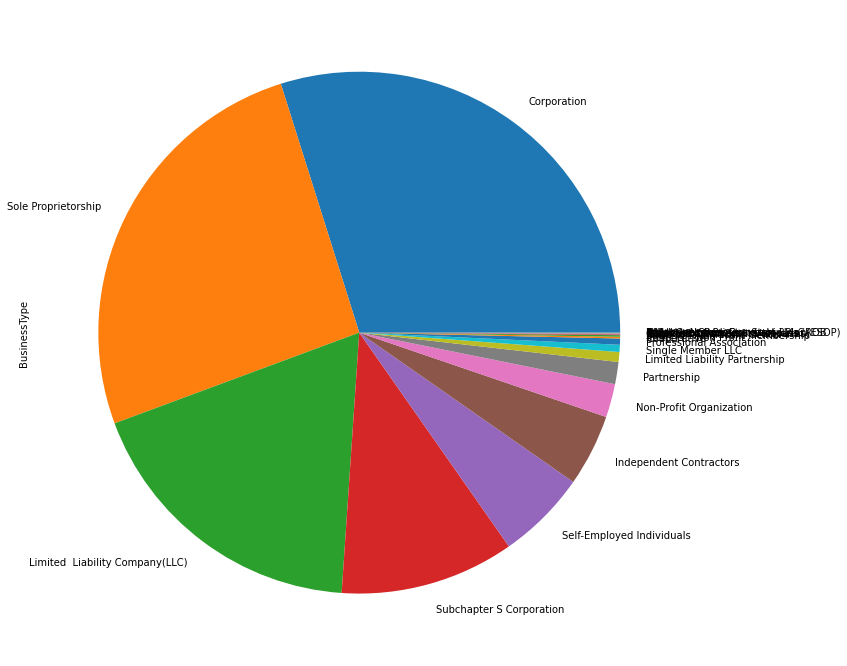

In [116]:
plt.figure(figsize=(14,12))
df.BusinessType.value_counts(normalize=True)
df.BusinessType.value_counts(normalize=True).plot.pie()
plt.show()

In [119]:
df['LoanStatus'].unique()

array(['Paid in Full', 'Exemption 4', 'Active Un-Disbursed'], dtype=object)

**check loan statust**

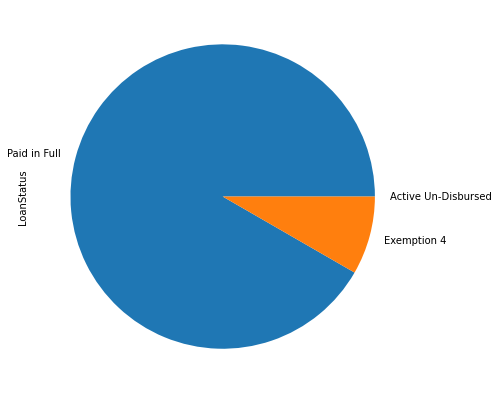

In [146]:
plt.figure(figsize=(10,7))
df1.LoanStatus.value_counts(normalize=True)
df1.LoanStatus.value_counts(normalize=True).plot.pie()
plt.show();

**original lender**

In [132]:
df3

Bank of America, National Association         True
JPMorgan Chase Bank, National Association     True
Wells Fargo Bank, National Association        True
Cross River Bank                              True
Harvest Small Business Finance, LLC           True
                                             ...  
Bluevine Capital Inc.                        False
Citizens State Bank of Arlington             False
Cashmere Valley Bank                         False
Logan Bank & Trust Company                   False
Sunset Science Park FCU                      False
Name: OriginatingLender, Length: 2068, dtype: bool

C:\Users\Rahul\machine_learning\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Rahul\machine_learning\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


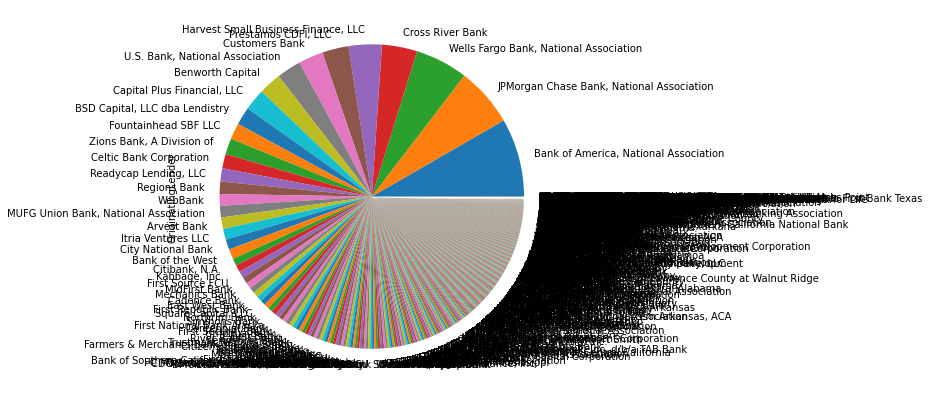

In [126]:
plt.figure(figsize=(10,7))
df.OriginatingLender.value_counts(normalize=True)
df.OriginatingLender.value_counts(normalize=True).plot.pie()
plt.show()

## b. Bivariate Analysis

**Total ammount per Buisnesstype**

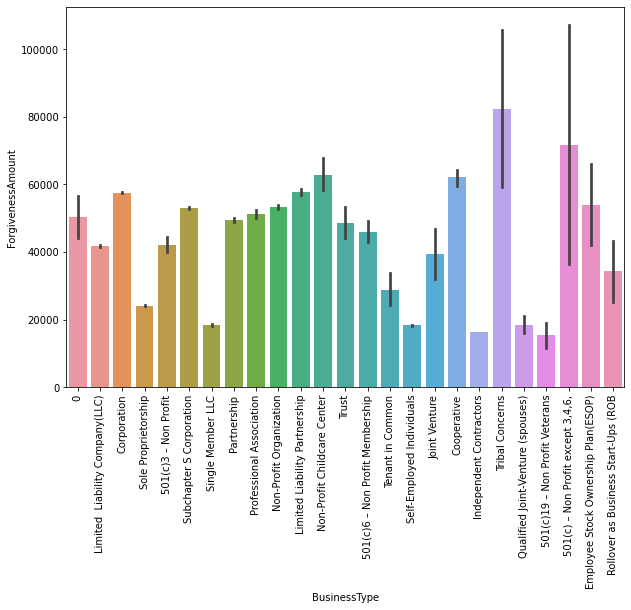

In [136]:
plt.figure(figsize=(10,7))
sns.barplot(data = df1, x='BusinessType', y = 'ForgivenessAmount')
plt.xticks(rotation = 90);

**Correlation matrix**

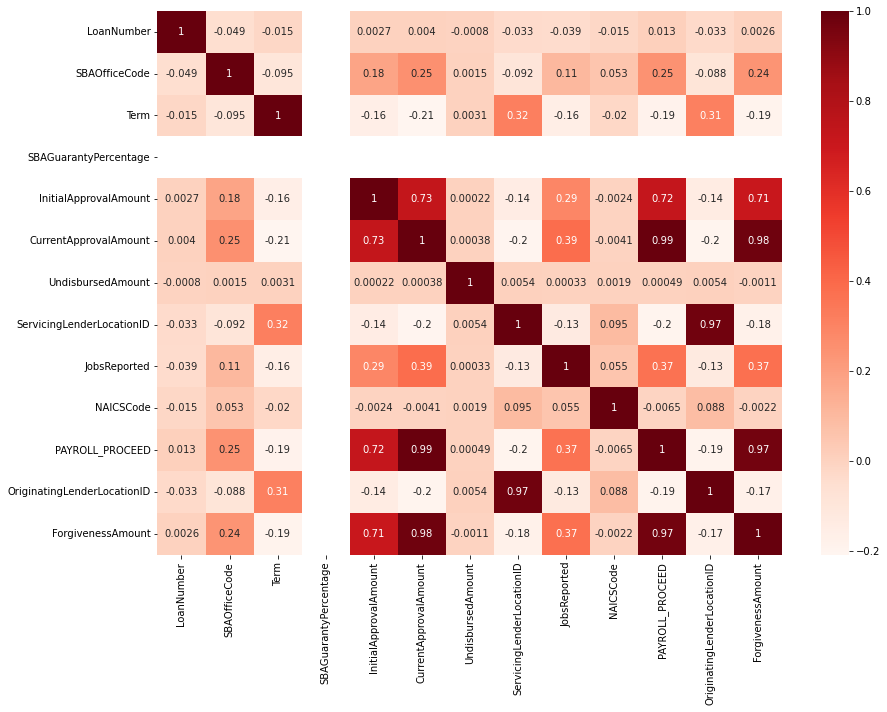

In [141]:
plt.figure(figsize=(14,10))
sns.heatmap(df1.corr(), annot=True, cmap = 'Reds')
plt.show();

**Final Dataset**

In [144]:
df1.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatus,...,Ethnicity,PAYROLL_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,ForgivenessAmount
1,5375617707,05/01/2020,101.0,PPP,NOT AVAILABLE,0,0,0,0,Paid in Full,...,Unknown/NotStated,148440.00,0,9551.0,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,150083.01
2,9677497701,05/01/2020,464.0,PPP,NORTH CHARLESTON HOSPITALITY GROUP LLC,192 College Park Rd,Ladson,0,29456-3517,Paid in Full,...,Unknown/NotStated,140081.78,Limited Liability Company(LLC),19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,141920.11
3,9547167709,05/01/2020,464.0,PPP,Q AND J SERVICES LLC,301 Old Georgetown Road,Manning,0,29102-2734,Paid in Full,...,Unknown/NotStated,136520.96,Limited Liability Company(LLC),19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,137747.78
5,6448037706,05/01/2020,515.0,PPP,OPTIMIZED PROCESS SOLUTIONS DBA AAA INDUSTRIES,24500 CAPITOL,REDFORD,0,48239-2446,Paid in Full,...,Not Hispanic or Latino,126798.00,Limited Liability Company(LLC),9551.0,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,127836.70
6,9609017706,05/01/2020,464.0,PPP,"D2 POWER SPORTS, LLC",125 Simuel Dr.,Spartanburg,0,29303-2085,Paid in Full,...,Unknown/NotStated,125916.00,Limited Liability Company(LLC),19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,127109.61
